In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42  # Use TrueType fonts
rcParams['axes.linewidth'] = 0.5
rcParams['xtick.major.width'] = 0.5
rcParams['ytick.major.width'] = 0.5
rcParams['savefig.dpi'] = 300  # Ensure a high resolution

In [ ]:
dataset_name = 'juvenile'
config_file = '../dataset_configs/juvenile_dataset.json'
# dataset_name = 'juvenile_dfovf'
# dataset_name = 'juvenile_noise_std0p2'
# dataset_name = 'juvenile_noise_std0p5'
# config_file = f'../../{dataset_name}_dataset/notebooks/{dataset_name}_dataset.json'

# dataset_name = 'adult'
# config_file = '../dataset_configs/adult_dataset.json'

window_name = 'time_window_3s'
window_name = 'time_window_5s'
window_name = 'time_window_7s'

from analysis_config import juvenile_window_name_to_frames, adult_window_name_to_frames
if dataset_name.startswith('juvenile'):
    frame_window = juvenile_window_name_to_frames[window_name]
    do_reorder_cs = True
    odor_orders = ['cs_plus', 'cs_minus', 'aa3', 'TDCA', 'TCA', 'GCA']
    vsnames = ['aa_vs_aa', 'aa_vs_ba', 'ba_vs_ba']
elif dataset_name.startswith('adult'):
    frame_window = adult_window_name_to_frames[window_name]
    do_reorder_cs = False
    odor_orders = None
    vsnames = ['learned_vs_learned', 'learned_vs_novel', 'novel_vs_novel']


print(window_name, frame_window)
metric = 'cosine'
metric = 'pattern_correlation'

from matplotlib.colors import Normalize, PowerNorm
if metric == 'cosine':
    cmap = 'jet_r'
    clim = [0, 0.55]
    if dataset_name == 'juvenile_dfovf':
        clim = [0, 0.7]
    color_norm = PowerNorm(gamma=1.7)
    if dataset_name == 'adult':
        color_norm = None
else:
    cmap = 'jet'
    clim = [0, 1]
    color_norm = None

import os
fig_dir = f'../figures/{dataset_name}/{window_name}/{metric}/'
os.makedirs(fig_dir, exist_ok=True)


time_window_7s [40, 93]


Extracted_Data_mock1_Fish1 None
Extracted_Data_mock1_Fish1 None
Extracted_Data_mock4_FishX None
Extracted_Data_mock5_FishX None
Extracted_Data_mock6_FishX None
Extracted_Data_mock8_FishY None
Extracted_Data_mockA10_FishX None
Extracted_Data_mockA10_FishY None
Extracted_Data_mockA10_fishZ None
Extracted_Data_Exp4_Fish3 None
Extracted_Data_Exp6_Fish1 None
Extracted_Data_Exp6_Fish4 None
Extracted_Data_Exp7_Fish3 None
Extracted_Data_Exp8_Fish1 None
Extracted_Data_Exp8_Fish4 None
Extracted_Data_ExpA10_Setup2_Fish1 None
Extracted_Data_ExpA10_Setup2_Fish2 None
Extracted_Data_ExpA10_Setup3_Fish1 None
ylabel_ vfontsize: 7
ylabel_ vfontsize: 7


Plotting delta matrix...
PlotMeanDeltaMatParams(figsize=(1.9, 1.9), colorbar_fontsize=7, ylabel_fontsize=7, ylabels=None, ylabel_colors=None, cmap='coolwarm', clim=None)
clim: (-0.1782096412819499, 0.1782096412819499)
ylabel_ vfontsize: 7


/tungstenfs/scratch/gfriedri/hubo/Ca_imaging/scripts/catrace/catrace/visualize.py:624: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_points = datadf.groupby(


/tungstenfs/scratch/gfriedri/hubo/Dp_manifold/BNP_dataset/data/Claire/spike_prob/dorsal/per_odor_aligned/index_formatted_firing_rate/pattern_correlation/window_40to93/cross_trial_similarity.pkl


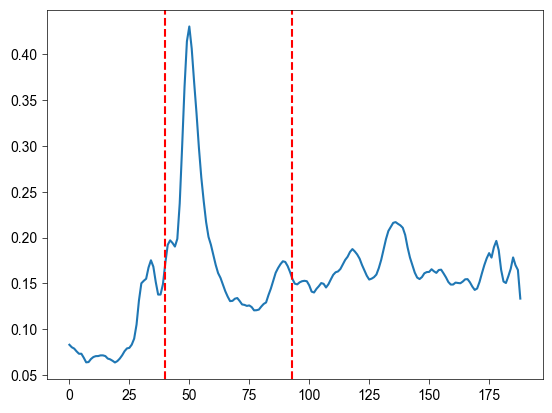

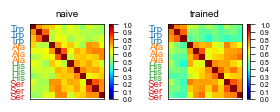

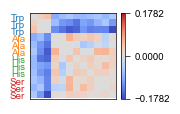

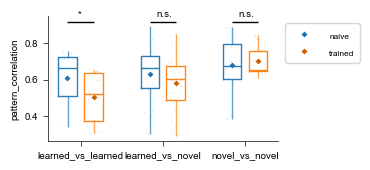

In [22]:
from catrace.run.run_pattern_similarity import run_pattern_similarity, RunPatternSimilarityParams, PlotPatternSimilarityParams
from catrace.visualize import PlotPerCondMatParams, PlotBoxplotMultiOdorCondParams
from matplotlib.colors import Normalize, PowerNorm
plot_params = PlotPatternSimilarityParams(
    per_cond = PlotPerCondMatParams(
        row_height=1.45,#1.35,
        col_width=1.45,#1.35,
        title_fontsize=7,
        ylabel_fontsize=7,
        ylabel_colors = None,
        ylabels = None,
        cmap=cmap,
        clim=clim,
        color_norm=color_norm,
        cbar_interval=0.1,
        colorbar_fontsize=5,
    ),
    mean_delta = dict(
        figsize=(1.9, 1.9),
        colorbar_fontsize = 7,
        ylabel_fontsize = 7,
    ),
    vs_measure = PlotBoxplotMultiOdorCondParams(
        figsize=(3.8, 1.8),
        label_fontsize=7,
        show_ns=True,
        mean_marker_size=1,
        pvalue_marker_xoffset=0.04,
        box_linewidth=1,
        strip_alpha=0.8,
        strip_size=0.5,
        pvalue_bar_linewidth=1,
    )
)

params = RunPatternSimilarityParams(
    config_file = config_file,
    assembly_name = '',
    time_window = frame_window,
    metric = metric,
    overwrite_computation = False,
    do_plot_per_fish = False,
    do_plot_per_condition = True,
    do_save_cross_trial = True,
    do_reorder_cs = do_reorder_cs,
    odor_orders = odor_orders,
    plot_params = plot_params,
    vsnames = vsnames,
    manifold_level = 'odor',
)

if params.assembly_name == '':
    assembly_label = 'all_neurons'
else:
    assembly_label = params.assembly_name

window_tag = f'window_{params.time_window[0]}_{params.time_window[1]}'
sim_dir, output_figs, test_results, cross_trial_path = run_pattern_similarity(params)
print(cross_trial_path)

In [23]:
from catrace.for_paper import save_figure_for_paper

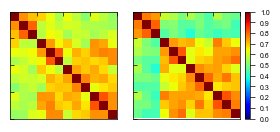

In [24]:
import copy
from matplotlib.ticker import MultipleLocator

def adjust_fig_per_cond(output_figs):
    fig_per_cond_copy = copy.deepcopy(output_figs['fig_per_cond'])
    ax = fig_per_cond_copy.get_axes()
    # Remove title for ax[0] and ax[1]
    ax[0].set_title('')
    ax[1].set_title('')
    # Delete y ticks
    # ax[0].set_yticks([])
    # ax[1].set_yticks([])
    # Delete y tick labels
    ax[0].set_yticklabels([])
    ax[1].set_yticklabels([])
    # put y ticks with interval of 3 using multiple locator
    ax[0].yaxis.set_major_locator(MultipleLocator(3))
    ax[1].yaxis.set_major_locator(MultipleLocator(3))
    # Get current y-ticks and adjust them to start at -0.5
    y_ticks_0 = ax[0].get_yticks()[1:]
    y_ticks_1 = ax[1].get_yticks()[1:]
    
    ax[0].set_yticks(y_ticks_0 - 0.5)
    ax[1].set_yticks(y_ticks_1 - 0.5)
    # Show y ticks
    ax[0].tick_params(axis='y', length=3, direction='in')
    ax[1].tick_params(axis='y', length=3, direction='in')

    # Do the same for x ticks
    ax[0].xaxis.set_major_locator(MultipleLocator(3))
    ax[1].xaxis.set_major_locator(MultipleLocator(3))
    x_ticks_0 = ax[0].get_xticks()[1:]
    x_ticks_1 = ax[1].get_xticks()[1:]
    ax[0].set_xticks(x_ticks_0 - 0.5)
    ax[1].set_xticks(x_ticks_1 - 0.5)
    ax[0].tick_params(axis='x', length=3, direction='in')
    ax[1].tick_params(axis='x', length=3, direction='in')
    ax[0].set_xticklabels([])
    ax[1].set_xticklabels([])
    # Put x ticks on top of the axes
    ax[0].xaxis.set_ticks_position('top')
    ax[1].xaxis.set_ticks_position('top')
    # # Delete colorbar on the first axes
    fig = fig_per_cond_copy
    fig.delaxes(fig.axes[2])
    fig_per_cond_copy.tight_layout()
    return fig_per_cond_copy

def adjust_fig_per_cond_adult(output_figs):
    fig_per_cond_copy = copy.deepcopy(output_figs['fig_per_cond'])
    ax = fig_per_cond_copy.get_axes()
    # Remove title for ax[0] and ax[1]
    ax[0].set_title('')
    ax[1].set_title('')
    # Delete y ticks
    # ax[0].set_yticks([])
    # ax[1].set_yticks([])
    # Delete y tick labels
    ax[0].set_yticklabels([])
    ax[1].set_yticklabels([])
    # put y ticks with interval of 3 using multiple locator
    ax[0].yaxis.set_major_locator(MultipleLocator(3))
    ax[1].yaxis.set_major_locator(MultipleLocator(3))
    # Get current y-ticks and adjust them to start at -0.5
    y_ticks_0 = ax[0].get_yticks()[1:]
    y_ticks_1 = ax[1].get_yticks()[1:]
    
    ax[0].set_yticks(y_ticks_0 - 0.5)
    ax[1].set_yticks(y_ticks_1 - 0.5)
    # Show y ticks
    ax[0].tick_params(axis='y', length=3, direction='in')
    ax[1].tick_params(axis='y', length=3, direction='in')

    # Do the same for x ticks
    ax[0].xaxis.set_major_locator(MultipleLocator(3))
    ax[1].xaxis.set_major_locator(MultipleLocator(3))
    x_ticks_0 = ax[0].get_xticks()[1:]
    x_ticks_1 = ax[1].get_xticks()[1:]
    ax[0].set_xticks(x_ticks_0 - 0.5)
    ax[1].set_xticks(x_ticks_1 - 0.5)
    ax[0].tick_params(axis='x', length=3, direction='in')
    ax[1].tick_params(axis='x', length=3, direction='in')
    ax[0].set_xticklabels([])
    ax[1].set_xticklabels([])
    # Put x ticks on top of the axes
    ax[0].xaxis.set_ticks_position('top')
    ax[1].xaxis.set_ticks_position('top')
    # # Delete colorbar on the first axes
    fig = fig_per_cond_copy
    fig.delaxes(fig.axes[2])
    fig_per_cond_copy.tight_layout()
    return fig_per_cond_copy

if dataset_name.startswith('juvenile'):
    adjust_fig_per_cond = adjust_fig_per_cond_juv
elif dataset_name.startswith('adult'):
    adjust_fig_per_cond = adjust_fig_per_cond_adult
fig_per_cond_copy = adjust_fig_per_cond(output_figs)
save_figure_for_paper(fig_per_cond_copy, f'{dataset_name}_{params.metric}_per_cond', fig_dir)
fig_per_cond_copy

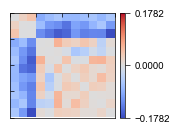

In [25]:
def adjust_ticks(ax):
    """
    Adjust the ticks of a single axes object.

    Parameters:
    - ax (matplotlib.axes.Axes): The axes object to be modified.
    """
    # Delete y tick labels
    ax.set_yticklabels([])
    
    # Set y ticks with an interval of 3 using MultipleLocator
    ax.yaxis.set_major_locator(MultipleLocator(3))
    
    # Get current y-ticks and adjust them to start at -0.5
    y_ticks = ax.get_yticks()[1:]
    ax.set_yticks(y_ticks - 0.5)
    
    # Show y ticks
    ax.tick_params(axis='y', length=3, direction='in')
    
    # Do the same for x ticks
    ax.xaxis.set_major_locator(MultipleLocator(3))
    x_ticks = ax.get_xticks()[1:]
    ax.set_xticks(x_ticks - 0.5)
    ax.tick_params(axis='x', length=3, direction='in')
    ax.xaxis.set_ticks_position('top')
    
    # Delete x tick labels
    ax.set_xticklabels([])


def adjust_fig_delta(output_figs):
    fig_delta_copy = copy.deepcopy(output_figs['fig_delta'])
    ax = fig_delta_copy.get_axes()
    adjust_ticks(ax[0])
    fig_delta_copy.tight_layout()
    return fig_delta_copy

fig_delta_copy = adjust_fig_delta(output_figs)
save_figure_for_paper(fig_delta_copy, f'{dataset_name}_{params.metric}_{window_tag}_mean_delta', fig_dir)
fig_delta_copy

/tmp/ipykernel_1063511/1688101096.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_xlabels)


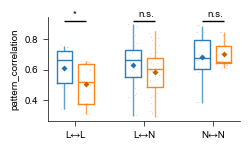

In [26]:
fig = output_figs['fig_multi_vs']
ax = fig.get_axes()[0]
# ax.set_ylim((0, 0.68))
ylabel = ax.get_ylabel()
if ylabel=='cosine':
    new_ylabel = 'Cosine distance'
else:
    new_ylabel = ylabel
ax.set_ylabel(new_ylabel)

if dataset_name.startswith('juvenile'):
    vslabel_mapping = {'aa_vs_aa': 'AA↔AA',
                    'aa_vs_ba': 'AA↔BA',
                    'ba_bs_aa': 'BA↔AA',
                    'ba_vs_ba': 'BA↔BA'}
elif dataset_name.startswith('adult'):
    vslabel_mapping = {'learned_vs_learned': 'L↔L',
                    'learned_vs_novel': 'L↔N',
                    'novel_vs_novel': 'N↔N'}
else:
    # Identity mapping
    vslabel_mapping = {key: key for key in vsnames}
xlabels = ax.get_xticklabels()
new_xlabels = [vslabel_mapping[label.get_text()] for label in xlabels]
ax.set_xticklabels(new_xlabels)
if ax.get_legend() is not None:
    ax.get_legend().remove()
# Change figure size
#fig.set_size_inches(2.8, 1.8)
fig.set_size_inches(2.6, 1.6)
fig.tight_layout()
save_figure_for_paper(output_figs['fig_multi_vs'], f'{dataset_name}_{params.metric}_{window_tag}_multi_vs', fig_dir)
output_figs['fig_multi_vs']

In [27]:
from catrace.stats import format_test_results_multi_odor_two_cond
sentence = format_test_results_multi_odor_two_cond(test_results)
sentence = sentence.replace('aa_vs_aa', 'AvsA').replace('aa_vs_ba', 'AvsB').replace('ba_vs_aa', 'BvsA').replace('ba_vs_ba', 'BvsB')
print(sentence)

For learned_vs_learned, Comparing naive (mean = 0.61 ± 0.145, n = 16) vs trained (mean = 0.50 ± 0.138, n = 18): Mann–Whitney U test, U = 204.00, P = 0.040. For learned_vs_novel, Comparing naive (mean = 0.63 ± 0.149, n = 32) vs trained (mean = 0.58 ± 0.161, n = 36): Mann–Whitney U test, U = 678.00, P = 0.212. For novel_vs_novel, Comparing naive (mean = 0.68 ± 0.156, n = 16) vs trained (mean = 0.70 ± 0.0840, n = 18): Mann–Whitney U test, U = 140.00, P = 0.904.
